In [89]:
#Import the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


1. Generate some Data
    
    Generate 100 dots
    

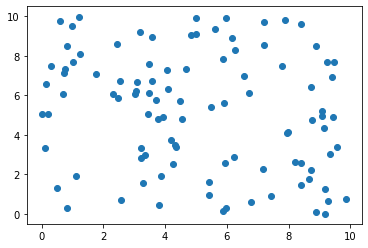

In [8]:
#Create Random Points in R^2, between 0,0 and 10,10 
x1=10*np.random.random(100)
x2=10*np.random.random(100)
plt.scatter(x1, x2)
plt.show()


2. Choose a Target Function

    Function chosen: 0.18 * x1 - x2 + 3.75 = 0
    
    Evaluate each point
    

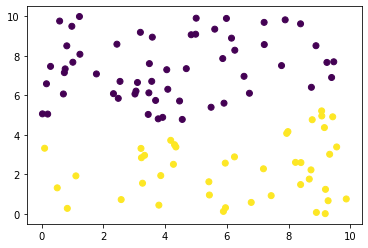

In [67]:
m=0.18
n=3.75

y=[]
for pos, x1_elem in enumerate(x1):
    x2_elem=x2[pos]
    res= m*x1_elem - x2_elem + n
    if(res>=0):
        y.append(1)
    else:
        y.append(-1)
        
plt.scatter(x1, x2, c=y)
plt.show()


3. Plot Your Data

    Lets see the data
    
    Lets plot also the line
    

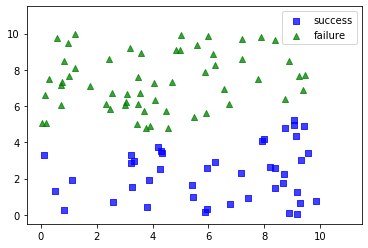

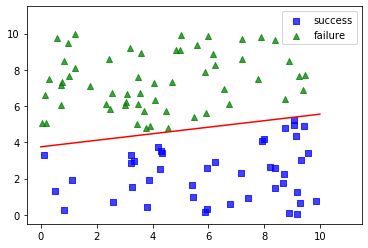

In [88]:
#First let separate the success form failure, to make it easier to plot
x1_success=[]
x2_success=[]

x1_failure=[]
x2_failure=[]

for pos, y_elem in enumerate(y):
    if(y_elem==1):
        x1_success.append(x1[pos])
        x2_success.append(x2[pos])
    else:
        x1_failure.append(x1[pos])
        x2_failure.append(x2[pos])

#Plot the points into the graph
success=plt.scatter(x1_success, x2_success, c="b", marker="s",label="success",alpha=0.75)
failure=plt.scatter(x1_failure, x2_failure, c="g", marker="^",label="failure",alpha=0.75)
plt.legend()
plt.xlim(-0.5,11.5)
plt.ylim(-0.5,11.5)
plt.show()

#Create points to draw the line
#Point 1: 
p1x=0
p1y=m*p1x + n
#Point 2:
p2x=10
p2y=m*p2x + n

#Now plot the graph with the line
success=plt.scatter(x1_success, x2_success, c="b", marker="s",label="success",alpha=0.75)
failure=plt.scatter(x1_failure, x2_failure, c="g", marker="^",label="failure",alpha=0.75)
line=plt.plot([p1x,p2x],[p1y,p2y],c="r")
plt.legend()
plt.xlim(-0.5,11.5)
plt.ylim(-0.5,11.5)
plt.show()


4. Create the Training Data

    Create a data frame with 3 columns
    

In [135]:
dic={'x1': x1, 'x2': x2, 'y':y}
df=pd.DataFrame(data=dic)
df

,x1,x2,y
0,5.607377,9.348393,-1
1,3.920239,4.886382,-1
2,4.685843,7.351371,-1
3,8.726362,2.229007,1
4,3.198488,9.188693,-1
...,...,...,...
95,7.212960,8.569780,-1
96,3.489345,7.605537,-1
97,5.986136,9.891561,-1
98,3.565591,6.708385,-1



5. Initialize the Perceptron

    𝑓(𝑥1, 𝑥2) = 𝑠𝑖𝑔𝑛(𝑤0 + 𝑤1 ∙ 𝑥1 + 𝑤2 ∙ 𝑥2)
    

In [136]:
#Create weights W0
w=(0,0,0) #(w1,w2,w3)



6. Classify the Data

    Make the prediction
    
    Execute the perceptron for all the data
    

In [137]:
#function that implemet the perceptron
def perceptron(x1_elem,x2_elem):
    pred_1=w[0] + w[1]*x1_elem + w[2]*x2_elem
    if(pred_1>=0):
        return (1)
    else:
        return (-1)

In [222]:
#Execute the perceptron
predicted = df.apply(lambda elem: perceptron(elem['x1'],elem['x2']),axis=1)
print(predicted)

0     1
1     1
2     1
3     1
4     1
     ..
95    1
96    1
97    1
98    1
99    1
Length: 100, dtype: int64


In [139]:
#Add the predicted values to the dataframe
df["predicted"]=predicted
df

,x1,x2,y,predicted
0,5.607377,9.348393,-1,1
1,3.920239,4.886382,-1,1
2,4.685843,7.351371,-1,1
3,8.726362,2.229007,1,1
4,3.198488,9.188693,-1,1
...,...,...,...,...
95,7.212960,8.569780,-1,1
96,3.489345,7.605537,-1,1
97,5.986136,9.891561,-1,1
98,3.565591,6.708385,-1,1



7. Generate the Confusion Matrix

    Evaluate the Prediction with the Expected result
    
    Execute the evaluation
    
    Create the Confusion Matrix
    

In [140]:
#Compares the expected result with the prediction. 
# 0: observations correctly predicted to be +1
# 1: observations incorrectly predicted to be +1
# 2: observations incorrectly predicted to be −1
# 3: observations correctly predicted to be −1
def eval_res(y_elem, predicted_elem):
    if(y_elem==1):
        if(predicted_elem==1):
            return (0)
        else:
            return (2)
    else:
        if(predicted_elem==1):
            return (1)
        else:
            return (3)

In [146]:
#Execute the evaluation and add it to the dataframe
result = df.apply(lambda row: eval_res(row['y'],row['predicted']),axis=1)
df["result"]=result
df

,x1,x2,y,predicted,result
0,5.607377,9.348393,-1,1,1
1,3.920239,4.886382,-1,1,1
2,4.685843,7.351371,-1,1,1
3,8.726362,2.229007,1,1,0
4,3.198488,9.188693,-1,1,1
...,...,...,...,...,...
95,7.212960,8.569780,-1,1,1
96,3.489345,7.605537,-1,1,1
97,5.986136,9.891561,-1,1,1
98,3.565591,6.708385,-1,1,1


In [219]:
#Count the number of each cases
case_count=df.result.value_counts()

#If an option does not appear we catch the exception, and we add a 0
res=[]
try:
    res.append(case_count.at[0])
except KeyError:
    res.append(0)
    
try:
    res.append(case_count.at[1])
except KeyError:
    res.append(0)
    
try:
    res.append(case_count.at[2])
except KeyError:
    res.append(0)
    
try:
    res.append(case_count.at[3])
except KeyError:
    res.append(0)


#Calculate the accuracy
accuracy= (res[0]+res[3]) / (res[0]+res[1]+res[2]+res[3]) * 100



In [221]:
#Print the Confusion Matrix and the Accuracy
print(res)
print("|----------------|-----------------------|-----------------------|")
print("|\t\t |\t Actual +1\t |\t Actual −1\t |")
print("|----------------|-----------------------|-----------------------|")
print("|Predicted +1 \t |\t " +str(res[0])+ "\t\t |\t " + str(res[1])+"\t\t |")
print("|----------------|-----------------------|-----------------------|")
print("|Predicted -1 \t |\t " +str(res[2])+ "\t\t |\t " + str(res[3])+"\t\t |")
print("|----------------|-----------------------|-----------------------|")
print("")
print("Accuracy: " + str(accuracy) + " %")

[43, 57, 0, 0]
|----------------|-----------------------|-----------------------|
|		 |	 Actual +1	 |	 Actual −1	 |
|----------------|-----------------------|-----------------------|
|Predicted +1 	 |	 43		 |	 57		 |
|----------------|-----------------------|-----------------------|
|Predicted -1 	 |	 0		 |	 0		 |
|----------------|-----------------------|-----------------------|

Accuracy: 43.0 %



8. Evaluate the Result.

    The accuracy is not at 100 %
    
    We need to continue, and modify the weights
    


9. Update the Weights
